In [ ]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
data = pd.read_csv("./diabetes.csv")

# Новый раздел

In [ ]:
data.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [ ]:
data['chol_hdl_ratio'] = pd.Series(data['chol_hdl_ratio']).str.replace(',','.')
data['bmi'] = pd.Series(data['bmi']).str.replace(',','.')
data['waist_hip_ratio'] = pd.Series(data['waist_hip_ratio']).str.replace(',','.')

In [ ]:
data = data.replace(['male', 'female'], [1.0, 0.0])
data = data.replace(['Diabetes', 'No diabetes'], [1.0, 0.0])

In [ ]:
data.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,0.0,61,119,22.5,118,70,32,38,0.84,0.0
1,2,146,79,41,3.6,19,0.0,60,135,26.4,108,58,33,40,0.83,0.0
2,3,217,75,54,4,20,0.0,67,187,29.3,110,72,40,45,0.89,0.0
3,4,226,97,70,3.2,20,0.0,64,114,19.6,122,64,31,39,0.79,0.0
4,5,164,91,67,2.4,20,0.0,70,141,20.2,122,86,32,39,0.82,0.0


In [ ]:
data.isnull().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [ ]:
null_values=['cholesterol','glucose','hdl_chol','chol_hdl_ratio','bmi','systolic_bp','diastolic_bp', 'waist', 'hip', 'waist_hip_ratio']

In [ ]:
for i in null_values :
    x = data[i].median()
    data[i].fillna(x, inplace = True)

In [ ]:
data.isnull().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [ ]:
data.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,0.0,61,119,22.5,118,70,32,38,0.84,0.0
1,2,146,79,41,3.6,19,0.0,60,135,26.4,108,58,33,40,0.83,0.0
2,3,217,75,54,4,20,0.0,67,187,29.3,110,72,40,45,0.89,0.0
3,4,226,97,70,3.2,20,0.0,64,114,19.6,122,64,31,39,0.79,0.0
4,5,164,91,67,2.4,20,0.0,70,141,20.2,122,86,32,39,0.82,0.0


In [ ]:
res = pd.DataFrame(data)
res.to_csv("res.txt",sep = ',')

In [ ]:
res_male = 0
res_female = 0

In [ ]:
for elem in res.values:
  if elem[-1] == 1:
    if elem[0] == 1:
      res_male+=1
    else:
      res_female +=1
print(res_male,res_female)

0 60


In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,shuffle=True,random_state= True)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print("Train Score: :" ,model.score(x_train,y_train))
print("Test Score : " ,model.score(x_test,y_test))

Train Score: : 0.9230769230769231
Test Score :  0.9102564102564102


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB


In [ ]:
model2 = BernoulliNB(binarize=0.0)
model2.fit(x_train, y_train)
print("Test score = ",model2.score(x_test, y_test))
print("Train score = ", model2.score(x_train, y_train))

Test score =  0.9358974358974359
Train score =  0.8910256410256411


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
params = {'n_estimators':200,
          'max_depth':12,
          'criterion':'friedman_mse',
          'learning_rate':0.03,
          'min_samples_leaf':16,
          'min_samples_split':16
          }
gbr = GradientBoostingRegressor(**params)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=12, min_samples_leaf=16,
                          min_samples_split=16, n_estimators=200)

In [ ]:
print("Score is" ,gbr.score(x_test,y_test))

Score is 0.45324255664965796


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))

1.0


In [ ]:
print(rfc.score(x_test,y_test))

0.8846153846153846


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Feature Importance')

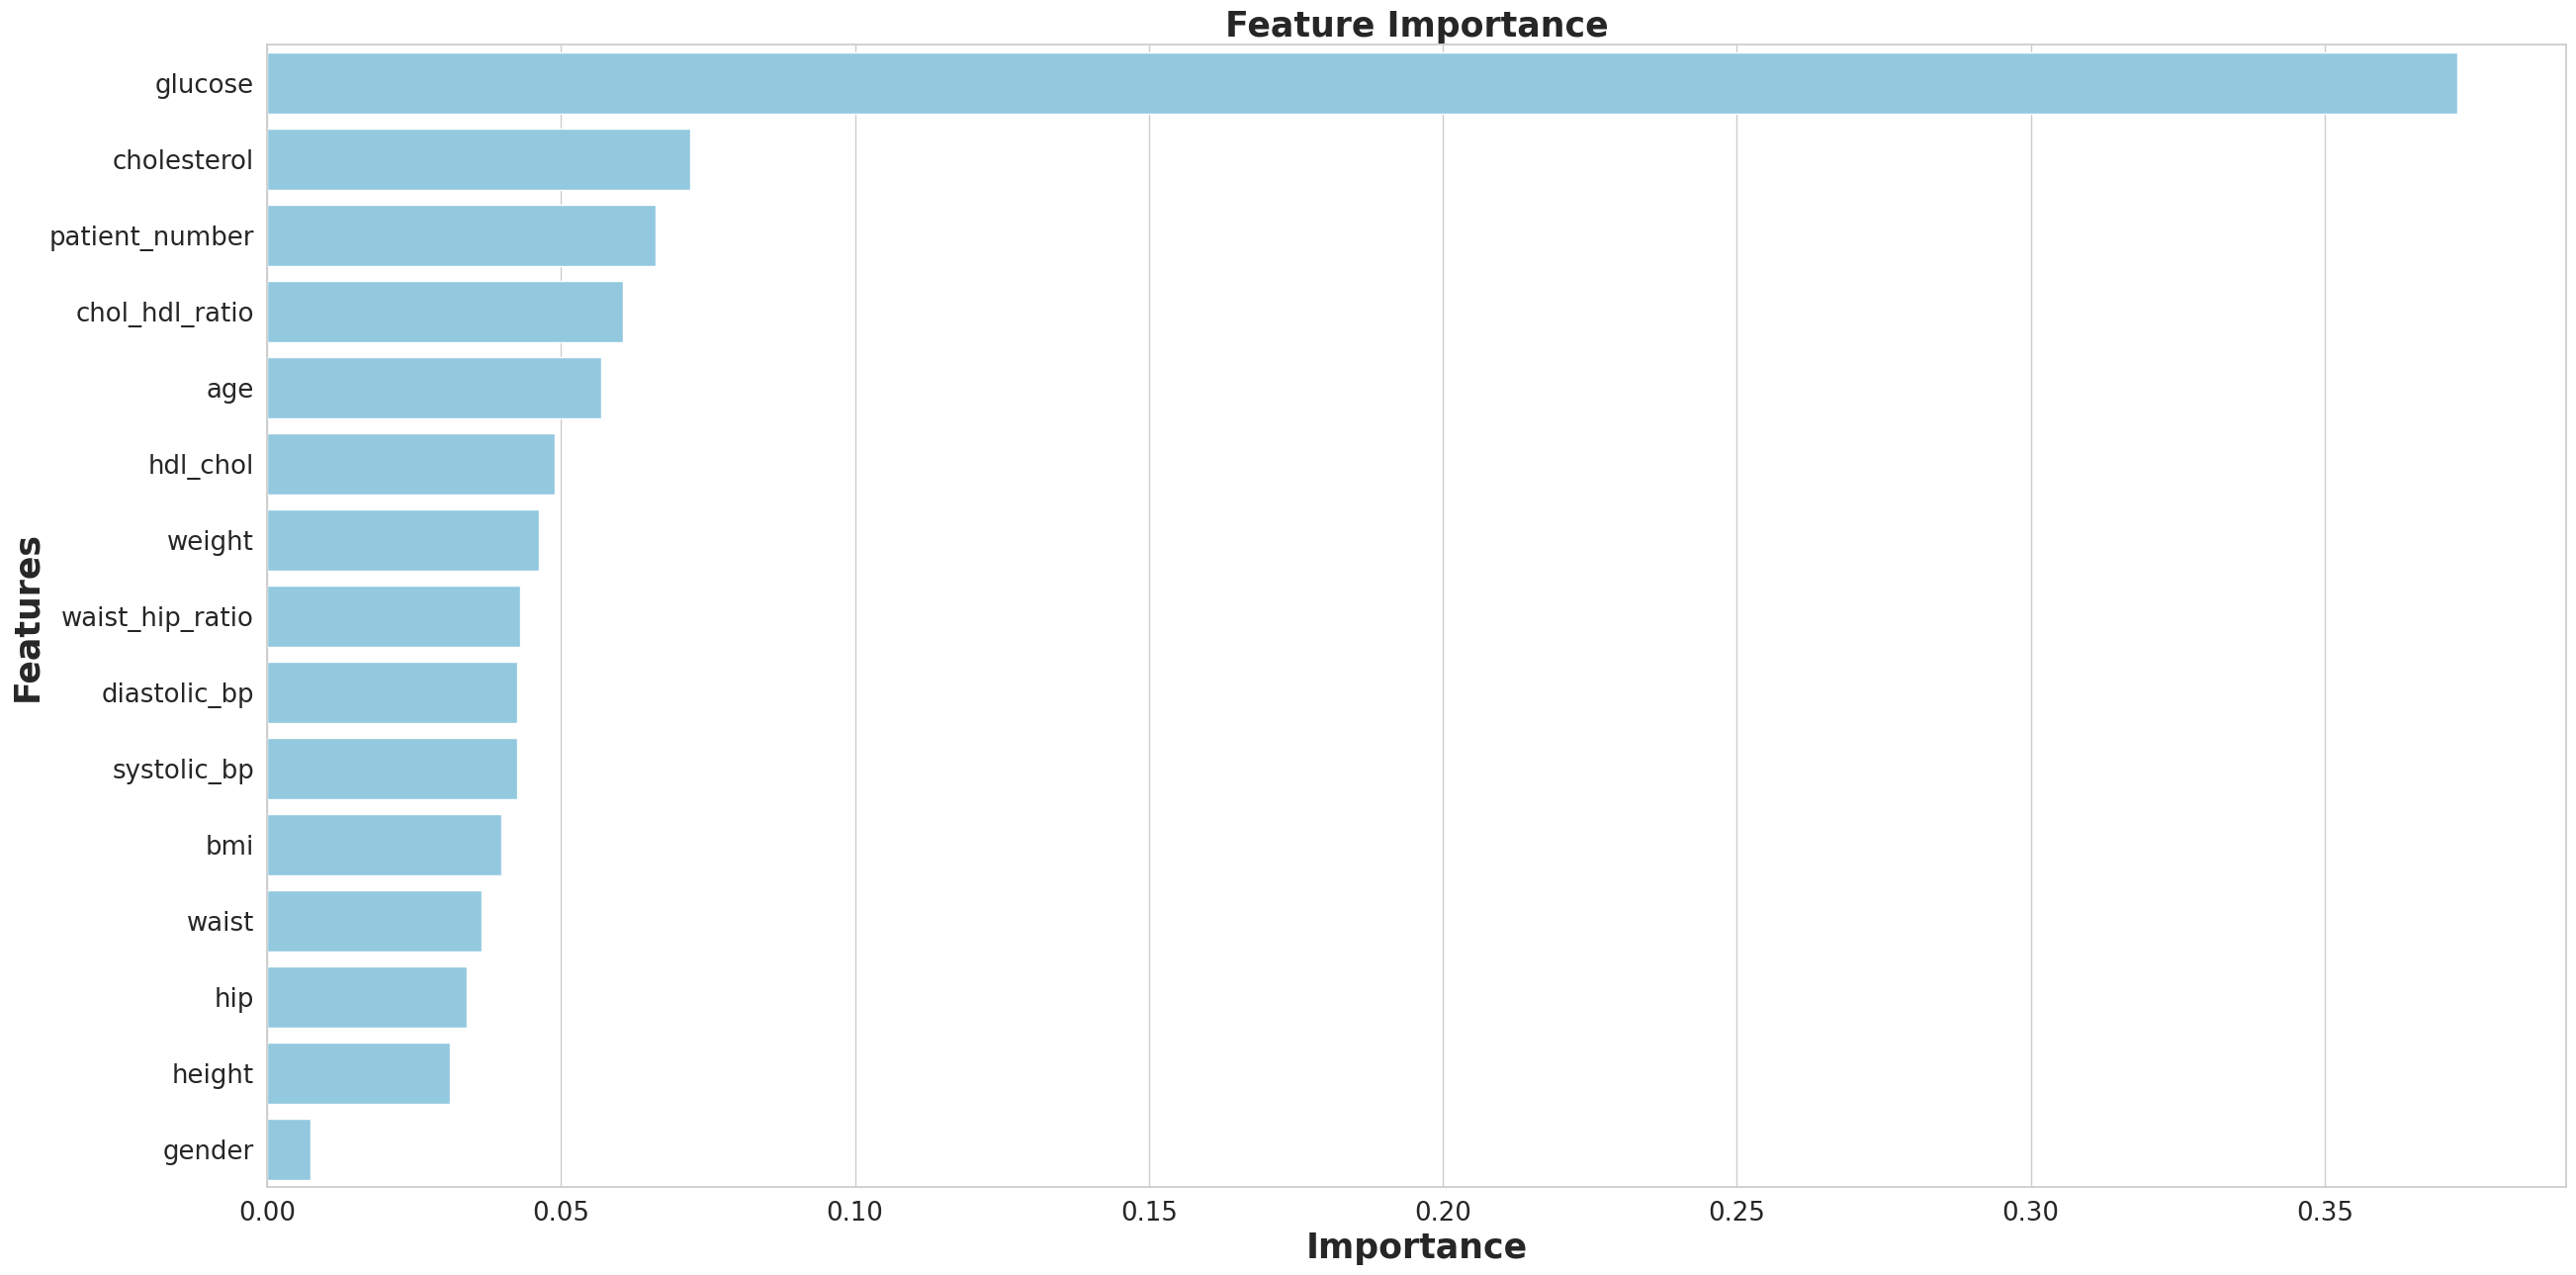

In [ ]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')